In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import pandas as pd
import urllib.request as url 
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import string

## Train

In [2]:
final = pd.read_csv('final_train_data.csv')

In [3]:
final.head()

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma
0,0,1004980,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2000,UNITED STATES SECURITIES EXCHANGE COMMISSION W...
1,1,815097,0,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",20607,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2008,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...
2,2,909954,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",17325,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2009,UNITED STATES SECURITIES EXCHANGE COMMISSION W...
3,3,32604,0,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",21641,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2002,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...
4,4,19617,0,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",3467,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",1994,PAGE UNITED STATES SECURITIES EXCHANGE COMMISS...


In [4]:
final['lemma_data'][2][0:100]

"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASHINGTON', 'DC', 'FORM', 'K', 'FISCA"

In [5]:
## The lemmatized words and in a list which is enclosed within a string. 
##So we define a function to convert enclosed list to list.

def convert(list):
    return eval(list)

In [6]:
final['lemma_list'] = final['lemma_data'].apply(lambda x: convert(x))

In [7]:
final.tail(2)

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list
2347,2348,820313,1,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",18409,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2012,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ..."
2348,2349,27904,0,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2016,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."


In [8]:
final.shape

(2349, 9)

## Test

In [8]:
test = pd.read_csv('final_test_data.csv')

In [10]:
test.shape

(856, 8)

In [11]:
test.head()

,Unnamed: 0,id,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma
0,0,0,40533,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",41108,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2012,TABLE OF CONTENTS UNITED STATES SECURITIES AND...
1,1,1,36270,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",37429,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",1999,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
2,2,2,315852,"['TABLE', 'OF', 'CONTENTS', 'SECURITIES', 'AND...",29882,"['TABLE', 'OF', 'CONTENTS', 'SECURITIES', 'AND...",2001,TABLE OF CONTENTS SECURITIES AND EXCHANGE COMM...
3,3,3,920148,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",43991,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2009,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
4,4,4,96021,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",28766,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2004,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...


In [180]:
test.tail()

,Unnamed: 0,id,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma
851,421,851,101829,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",18992,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2014,TABLE OF CONTENTS UNITED STATES SECURITIES AND...
852,422,852,101778,"['USE', 'THESE', 'LINKS', 'TO', 'RAPIDLY', 'RE...",62174,"['USE', 'THESE', 'LINKS', 'TO', 'RAPIDLY', 'RE...",2005,USE THESE LINKS TO RAPIDLY REVIEW THE DOCUMENT...
853,423,853,879101,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",56179,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2013,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...
854,424,854,849399,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",47351,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2012,TABLE OF CONTENTS UNITED STATES SECURITIES AND...
855,425,855,63276,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",52851,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2011,TABLE OF CONTENTS UNITED STATES SECURITIES AND...


In [182]:
test['lemma_list'] = test['lemma_data'].apply(lambda x: convert(x))

## Remove Finance Stopwords

In [143]:
auditor = pd.read_csv('StopWords_Auditor.txt', header = None)
currency = pd.read_csv('StopWords_Currencies.txt', header = None, encoding = 'unicode_escape')
date_num = pd.read_csv('StopWords_DatesandNumbers.txt',header = None, encoding = 'unicode_escape')
gen = pd.read_csv('StopWords_Generic.txt', header = None, encoding = 'unicode_escape')
geo = pd.read_csv('StopWords_Geographic.txt', header = None, encoding = 'unicode_escape')
names = pd.read_csv("StopWords_Names.txt", header = None, encoding = 'unicode_escape')

stopwords_df = pd.concat([currency, date_num, gen, geo, names, auditor])

print(stopwords_df.shape)

stopwords_list = stopwords_df[0].tolist()

print(stopwords_list[0:100])

(13536, 1)
['AFGHANI', 'ARIARY', 'BAHT', 'BALBOA', 'BIRR', 'BOLIVAR', 'BOLIVIANO', 'CEDI', 'COLON', 'CÓRDOBA', 'DALASI', 'DENAR', 'DINAR', 'DIRHAM', 'DOBRA', 'DONG', 'DRAM', 'ESCUDO', 'EURO', 'FLORIN', 'FORINT', 'GOURDE', 'GUARANI', 'GULDEN', 'HRYVNIA', 'KINA', 'KIP', 'KONVERTIBILNA MARKA', 'KORUNA', 'KRONA', 'KRONE', 'KROON', 'KUNA', 'KWACHA', 'KWANZA', 'KYAT', 'LARI ', 'LATS', 'LEK', 'LEMPIRA', 'LEONE', 'LEU', 'LEV', 'LILANGENI', 'LIRA', 'LITAS', 'LOTI', 'MANAT', 'METICAL', 'NAIRA', 'NAKFA', 'NEW LIRA', 'NEW SHEQEL', 'NGULTRUM', 'NUEVO SOL', 'OUGUIYA', 'PATACA', 'PESO', 'POUND', 'PULA ', 'QUETZAL', 'RAND', 'REAL', 'RENMINBI', 'RIAL', 'RIEL', 'RINGGIT', 'RIYAL', 'RUBLE', 'RUFIYAA', 'RUPEE', 'RUPEE', 'RUPIAH', 'SHILLING', 'SOM', 'SOMONI', 'SPECIAL DRAWING RIGHTS', 'TAKA', 'TALA', 'TENGE', 'TUGRIK', 'VATU', 'WON', 'YEN', 'ZLOTY', 'HUNDRED  ', 'THOUSAND', 'MILLION', 'BILLION', 'TRILLION', 'DATE ', 'ANNUAL', 'ANNUALLY', 'ANNUM', 'YEAR', 'YEARLY', 'QUARTER', 'QUARTERLY', 'QTR', 'MONTH']


In [206]:
stop_words = [stop_words_removed for row in final['lemma_list'] if word not in stopwords_list]        

In [209]:
len(stop_words)

2349

In [212]:
final['text_tokens'] = stop_words

In [213]:
final.head()

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,text_tokens
0,0,1004980,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2000,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."
1,1,815097,0,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",20607,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2008,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...,"[SECURITIES, EXCHANGE, COMMISSION, WASHINGTON,...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."
2,2,909954,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",17325,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2009,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."
3,3,32604,0,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",21641,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2002,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."
4,4,19617,0,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",3467,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",1994,PAGE UNITED STATES SECURITIES EXCHANGE COMMISS...,"[PAGE, UNITED, STATES, SECURITIES, EXCHANGE, C...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS..."


## Mapping words to dictionary

### Train Data

In [9]:
master_vocab_df = pd.read_csv('finance_word_dictionary-1570171303593.csv')

In [120]:
master_vocab_df.tail()

,Word,Sequence Number,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV,Syllables,Source
85216,ZYGOTE,85217,39,2.273972e-09,9.447251e-10,2.083258e-07,27,0,0,0,0,0,0,0,0,0,0,2,12of12inf
85217,ZYGOTES,85218,1,5.830698e-11,2.158739e-11,2.129368e-08,1,0,0,0,0,0,0,0,0,0,0,2,12of12inf
85218,ZYGOTIC,85219,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,3,12of12inf
85219,ZYMURGIES,85220,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,3,12of12inf
85220,ZYMURGY,85221,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,0,0,0,3,12of12inf


In [148]:
master_pos_df = master_vocab_df[(master_vocab_df.Positive == 1)]

In [156]:
master_pos_df.head()

,Word,Sequence Number,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV,Syllables,Source
125,ABLE,126,3688692,2.150765e-04,2.191900e-04,0.000322,601689,0,1,0,0,0,0,0,0,0,0,2,12of12inf
334,ABUNDANCE,335,6144,3.582381e-07,3.801956e-07,0.000009,5051,0,1,0,0,0,0,0,0,0,0,3,12of12inf
336,ABUNDANT,337,10235,5.967719e-07,5.578873e-07,0.000011,7516,0,1,0,0,0,0,0,0,0,0,3,12of12inf
435,ACCLAIMED,436,1845,1.075764e-07,9.835266e-08,0.000004,1401,0,1,0,0,0,0,0,0,0,0,2,12of12inf
474,ACCOMPLISH,475,156493,9.124634e-06,9.643273e-06,0.000049,105310,0,1,0,0,0,0,0,0,0,0,3,12of12inf


In [150]:
master_neg_df = master_vocab_df[(master_vocab_df.Negative) == 1]

In [153]:
master_neg_df.head()

,Word,Sequence Number,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Constraining,Superfluous,Interesting,Modal,Irr_Verb,Harvard_IV,Syllables,Source
9,ABANDON,10,91939,5.360685e-06,4.937376e-06,0.000038,51515,1,0,0,0,0,0,0,0,0,1,3,12of12inf
10,ABANDONED,11,190420,1.110281e-05,1.117033e-05,0.000080,90080,1,0,0,0,0,0,0,0,0,2,3,12of12inf
11,ABANDONING,12,17789,1.037223e-06,9.262749e-07,0.000013,11123,1,0,0,0,0,0,0,0,0,2,4,12of12inf
12,ABANDONMENT,13,209990,1.224388e-05,1.190908e-05,0.000080,73695,1,0,0,0,0,0,0,0,0,1,4,12of12inf
13,ABANDONMENTS,14,8596,5.012068e-07,6.509061e-07,0.000016,4455,1,0,0,0,0,0,0,0,0,2,4,12of12inf


In [11]:
print('Negative Value Counts: \n\n', master_vocab_df['Negative'].value_counts(),
     '\n\nPositive Value Counts: \n\n', master_vocab_df['Positive'].value_counts(),
     '\n\nUncertainty Value Counts:\n\n', master_vocab_df['Uncertainty'].value_counts(),
     '\n\n Litigious Value Counts: \n\n', master_vocab_df['Litigious'].value_counts(),
     '\n\nConstraining Value Counts:\n\n', master_vocab_df['Constraining'].value_counts(),
     '\n\nSuperfluous Value Counts:\n\n', master_vocab_df['Superfluous'].value_counts(),
     '\n\nInteresting Value Counts:\n\n', master_vocab_df['Interesting'].value_counts(),
     '\n\nModal Value Counts:\n\n', master_vocab_df['Modal'].value_counts(),
     '\n\nIrr_Verb Value Counts: \n\n', master_vocab_df['Irr_Verb'].value_counts(),
     '\n\nHarvard_IV Value Counts: \n\n', master_vocab_df['Harvard_IV'].value_counts())

Negative Value Counts: 

 0    82866
1     2355
Name: Negative, dtype: int64 

Positive Value Counts: 

 0    84867
1      354
Name: Positive, dtype: int64 

Uncertainty Value Counts:

 0    84924
1      297
Name: Uncertainty, dtype: int64 

 Litigious Value Counts: 

 0    84318
1      903
Name: Litigious, dtype: int64 

Constraining Value Counts:

 0    85037
1      184
Name: Constraining, dtype: int64 

Superfluous Value Counts:

 0    85165
1       56
Name: Superfluous, dtype: int64 

Interesting Value Counts:

 0    85153
1       68
Name: Interesting, dtype: int64 

Modal Value Counts:

 0    85161
3       27
1       19
2       14
Name: Modal, dtype: int64 

Irr_Verb Value Counts: 

 0    85063
1      158
Name: Irr_Verb, dtype: int64 

Harvard_IV Value Counts: 

 0    81033
2     2183
1     2005
Name: Harvard_IV, dtype: int64


In [141]:
import time
from time import sleep
from tqdm import tqdm_notebook as tq

In [230]:
neg = []
pos = []


for i in tq(range(len(final['text_tokens']))):
    sleep(0.01)
    
    neg_count = 0
    pos_count = 0
    
    for j in range(len(final['text_tokens'][i])):
        mapword_neg = master_neg_df.loc[master_neg_df['Word'].values == final['text_tokens'][i][j],].values
        mapword_pos = master_pos_df.loc[master_pos_df['Word'].values == final['text_tokens'][i][j],].values
        
        if len(mapword_neg) is not 0:
    
            neg_count += 1
        
        if len(mapword_pos) is not 0:
            
            pos_count += 1
            
                
    
    neg.append(neg_count)
    pos.append(pos_count)

In [231]:
len(pos)

2349

In [232]:
len(neg)

2349

In [202]:
neg[1071]

IndexError: list index out of range

In [200]:
len(first_sent[0:1072])

1072

In [233]:
final['Positive_Count'] = pos
final['Negative_Count'] = neg

In [234]:
final

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,text_tokens,Positive_Count,Negative_Count
0,0,1004980,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2000,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
1,1,815097,0,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",20607,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2008,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...,"[SECURITIES, EXCHANGE, COMMISSION, WASHINGTON,...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
2,2,909954,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",17325,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2009,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
3,3,32604,0,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",21641,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2002,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
4,4,19617,0,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",3467,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",1994,PAGE UNITED STATES SECURITIES EXCHANGE COMMISS...,"[PAGE, UNITED, STATES, SECURITIES, EXCHANGE, C...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
5,5,1002910,1,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",28023,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2016,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...,"[SECURITIES, EXCHANGE, COMMISSION, WASHINGTON,...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
6,6,59478,0,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",59263,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2006,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
7,7,77360,0,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",23501,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2014,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
8,8,77476,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",36965,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2013,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
9,9,743988,0,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",34533,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2014,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709


In [235]:
train_sent = final[['Positive_Count', 'Negative_Count']]

In [236]:
train_sent

,Positive_Count,Negative_Count
0,388,709
1,388,709
2,388,709
3,388,709
4,388,709
5,388,709
6,388,709
7,388,709
8,388,709
9,388,709


In [241]:
neg_2 = []
pos_2 = []


for i in tq(range(len(final['lemma_list'][0:1000]))):
    sleep(0.01)
    
    neg_count = 0
    pos_count = 0
    
    for j in range(len(final['lemma_list'][i])):
        mapword_neg = master_neg_df.loc[master_neg_df['Word'].values == final['lemma_list'][i][j],].values
        mapword_pos = master_pos_df.loc[master_pos_df['Word'].values == final['lemma_list'][i][j],].values
        
        if len(mapword_neg) is not 0:
    
            neg_count += 1
        
        if len(mapword_pos) is not 0:
            
            pos_count += 1
            
                
    
    neg_2.append(neg_count)
    pos_2.append(pos_count)

In [242]:
len(neg_2)

1000

In [243]:
len(pos_2)

1000

In [245]:
final_train = final[0:1000]

In [246]:
final_train.tail()

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,text_tokens,Positive_Count,Negative_Count
995,995,60086,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",32208,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2017,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
996,996,14272,1,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",49344,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2014,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
997,997,829224,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",43222,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2000,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
998,998,773910,1,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",4422,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2009,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...,"[SECURITIES, EXCHANGE, COMMISSION, WASHINGTON,...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709
999,999,941548,1,"['TABLE', 'CONTENTS', 'INDEX', 'FINANCIAL', 'S...",40715,"['TABLE', 'CONTENTS', 'INDEX', 'FINANCIAL', 'S...",2006,TABLE CONTENTS INDEX FINANCIAL STATEMENTS UNIT...,"[TABLE, CONTENTS, INDEX, FINANCIAL, STATEMENTS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",388,709


In [247]:
final_train['Positive_Count'] = pos_2
final_train['Negative_Count'] = neg_2

C:\Users\UrMili\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\UrMili\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [249]:
train_sent_dict = {'positive': pos_2, 'negative': neg_2}

In [250]:
train_sent_df = pd.DataFrame(train_sent_dict)

In [252]:
train_sent_df.to_csv('train_sentiment_df.csv')

In [248]:
final_train.head()

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,text_tokens,Positive_Count,Negative_Count
0,0,1004980,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2000,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",407,709
1,1,815097,0,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",20607,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2008,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...,"[SECURITIES, EXCHANGE, COMMISSION, WASHINGTON,...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",98,395
2,2,909954,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",17325,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2009,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",179,324
3,3,32604,0,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",21641,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2002,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",209,438
4,4,19617,0,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",3467,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",1994,PAGE UNITED STATES SECURITIES EXCHANGE COMMISS...,"[PAGE, UNITED, STATES, SECURITIES, EXCHANGE, C...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",12,33


In [254]:
final_train['Positive_Ratio'] = final_train['Positive_Count']/final_train['word_count_sw_rem']

C:\Users\UrMili\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [255]:
final_train['Negative_Ratio'] = final_train['Negative_Count']/final_train['word_count_sw_rem']

C:\Users\UrMili\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [256]:
final_train.head()

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,text_tokens,Positive_Count,Negative_Count,Positive_Ratio,Negative_Ratio
0,0,1004980,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2000,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",407,709,0.013210,0.023013
1,1,815097,0,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",20607,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2008,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...,"[SECURITIES, EXCHANGE, COMMISSION, WASHINGTON,...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",98,395,0.004756,0.019168
2,2,909954,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",17325,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2009,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",179,324,0.010332,0.018701
3,3,32604,0,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",21641,"['TABLE', 'CONTENTS', 'UNITED', 'STATES', 'SEC...",2002,TABLE CONTENTS UNITED STATES SECURITIES EXCHAN...,"[TABLE, CONTENTS, UNITED, STATES, SECURITIES, ...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",209,438,0.009658,0.020239
4,4,19617,0,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",3467,"['PAGE', 'UNITED', 'STATES', 'SECURITIES', 'EX...",1994,PAGE UNITED STATES SECURITIES EXCHANGE COMMISS...,"[PAGE, UNITED, STATES, SECURITIES, EXCHANGE, C...","[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",12,33,0.003461,0.009518


In [263]:
final_train = final_train.drop(columns = ['text_tokens'])

### Test Data

In [257]:
test.tail()

,Unnamed: 0,id,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list
851,421,851,101829,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",18992,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2014,TABLE OF CONTENTS UNITED STATES SECURITIES AND...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI..."
852,422,852,101778,"['USE', 'THESE', 'LINKS', 'TO', 'RAPIDLY', 'RE...",62174,"['USE', 'THESE', 'LINKS', 'TO', 'RAPIDLY', 'RE...",2005,USE THESE LINKS TO RAPIDLY REVIEW THE DOCUMENT...,"[USE, THESE, LINKS, TO, RAPIDLY, REVIEW, THE, ..."
853,423,853,879101,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",56179,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2013,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO..."
854,424,854,849399,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",47351,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2012,TABLE OF CONTENTS UNITED STATES SECURITIES AND...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI..."
855,425,855,63276,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",52851,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2011,TABLE OF CONTENTS UNITED STATES SECURITIES AND...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI..."


In [ ]:
neg = []
pos = []

for i in tq(range(len(test['lemma_list'][650:]))):
    sleep(0.01)
#    print(i)
    neg_count = 0
    pos_count = 0

    
    for j in range(len(test['lemma_list'][i])):
        mapword_neg = master_neg_df.loc[master_neg_df['Word'].values == test['lemma_list'][i][j],].values
        mapword_pos = master_pos_df.loc[master_pos_df['Word'].values == test['lemma_list'][i][j],].values
        
        if len(mapword_neg) is not 0:
    
            neg_count += 1
        
        if len(mapword_pos) is not 0:
            pos_count += 1
            
    
    neg.append(neg_count)
    pos.append(pos_count)

In [258]:
first_test_sent = pd.read_csv('First_test_sentiment.csv')
second_test_sent = pd.read_csv('Second_test_sentiment.csv')

In [259]:
test_sent = pd.concat([first_test_sent, second_test_sent])

In [261]:
test_sent.tail()

,Unnamed: 0,id,Positive_Count,Negative_Count
725,851,851,88,125
726,852,852,151,373
727,853,853,55,222
728,854,854,610,1347
729,855,855,234,480


In [262]:
final_test = pd.merge(test, test_sent, left_on = 'id', right_on = 'id')

In [264]:
final_test.head()

,Unnamed: 0_x,id,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,Unnamed: 0_y,Positive_Count,Negative_Count
0,0,0,40533,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",41108,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2012,TABLE OF CONTENTS UNITED STATES SECURITIES AND...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",0,357,410
1,1,1,36270,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",37429,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",1999,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",1,183,349
2,2,2,315852,"['TABLE', 'OF', 'CONTENTS', 'SECURITIES', 'AND...",29882,"['TABLE', 'OF', 'CONTENTS', 'SECURITIES', 'AND...",2001,TABLE OF CONTENTS SECURITIES AND EXCHANGE COMM...,"[TABLE, OF, CONTENTS, SECURITIES, AND, EXCHANG...",2,232,539
3,3,3,920148,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",43991,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2009,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",3,361,710
4,4,4,96021,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",28766,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2004,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",4,182,259


In [265]:
final_test = final_test.drop(columns = ['Unnamed: 0_x', 'Unnamed: 0_y'])

In [267]:
final_test['Positive_Ratio'] = final_test['Positive_Count']/final_test['word_count_sw_rem']
final_test['Negative_Ratio'] = final_test['Negative_Count']/final_test['word_count_sw_rem']

In [268]:
final_test.tail()

,id,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,Positive_Count,Negative_Count,Positive_Ratio,Negative_Ratio
851,851,101829,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",18992,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2014,TABLE OF CONTENTS UNITED STATES SECURITIES AND...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",88,125,0.004634,0.006582
852,852,101778,"['USE', 'THESE', 'LINKS', 'TO', 'RAPIDLY', 'RE...",62174,"['USE', 'THESE', 'LINKS', 'TO', 'RAPIDLY', 'RE...",2005,USE THESE LINKS TO RAPIDLY REVIEW THE DOCUMENT...,"[USE, THESE, LINKS, TO, RAPIDLY, REVIEW, THE, ...",151,373,0.002429,0.005999
853,853,879101,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",56179,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",2013,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",55,222,0.000979,0.003952
854,854,849399,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",47351,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2012,TABLE OF CONTENTS UNITED STATES SECURITIES AND...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",610,1347,0.012883,0.028447
855,855,63276,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",52851,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2011,TABLE OF CONTENTS UNITED STATES SECURITIES AND...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",234,480,0.004428,0.009082


## Data Visualization

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt

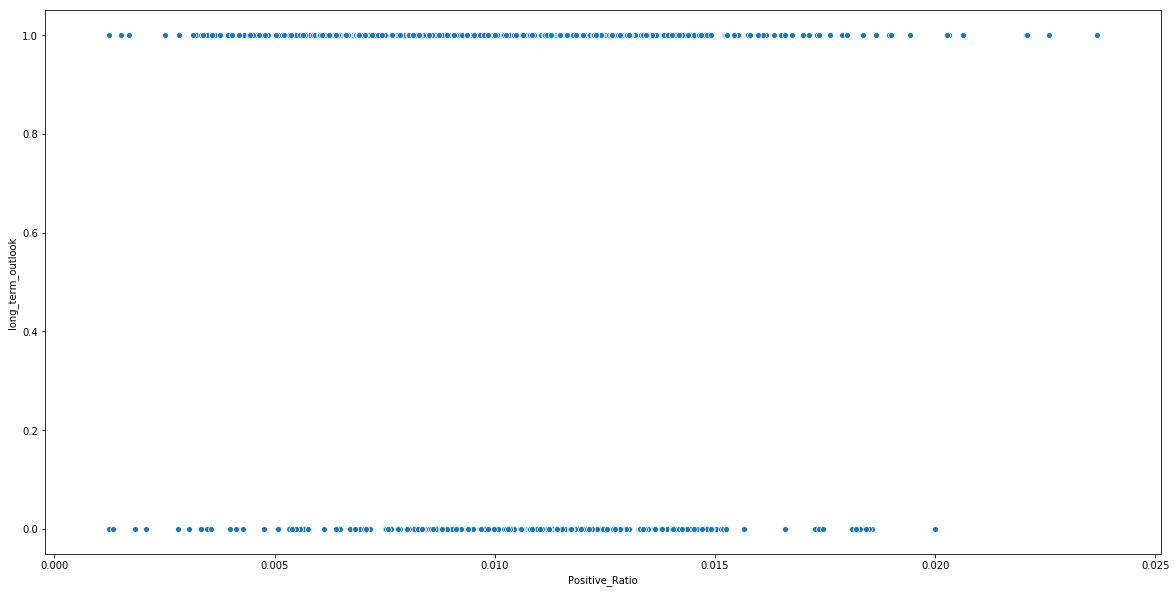

In [374]:
sns.scatterplot(x = final_train['Positive_Ratio'], y = final_train['long_term_outlook'])

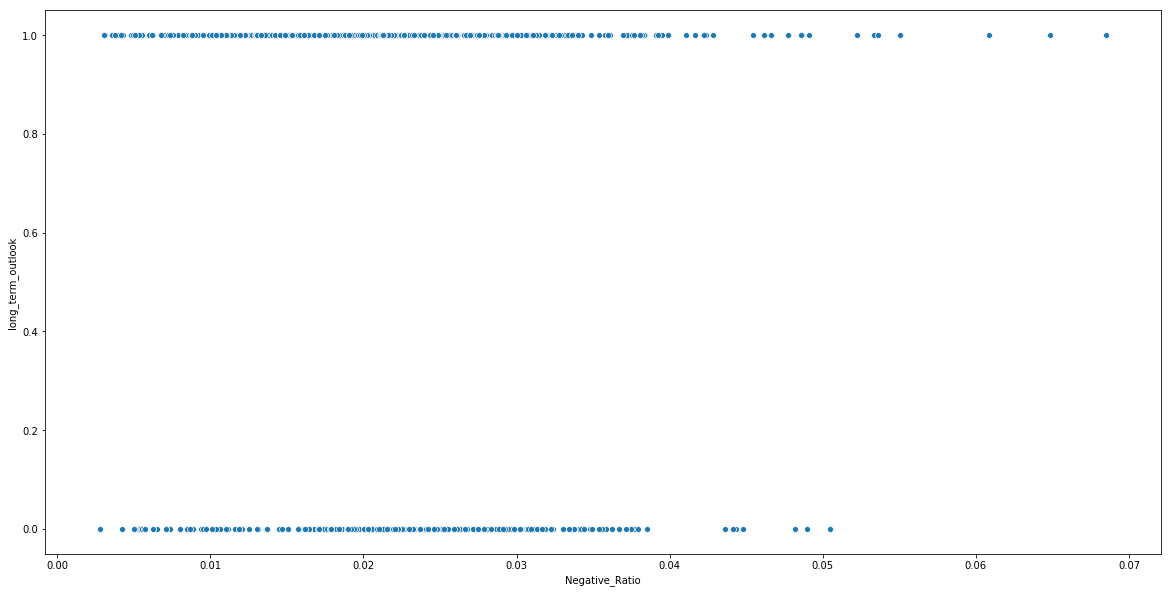

In [375]:
sns.scatterplot(x = final_train['Negative_Ratio'], y = final_train['long_term_outlook'])

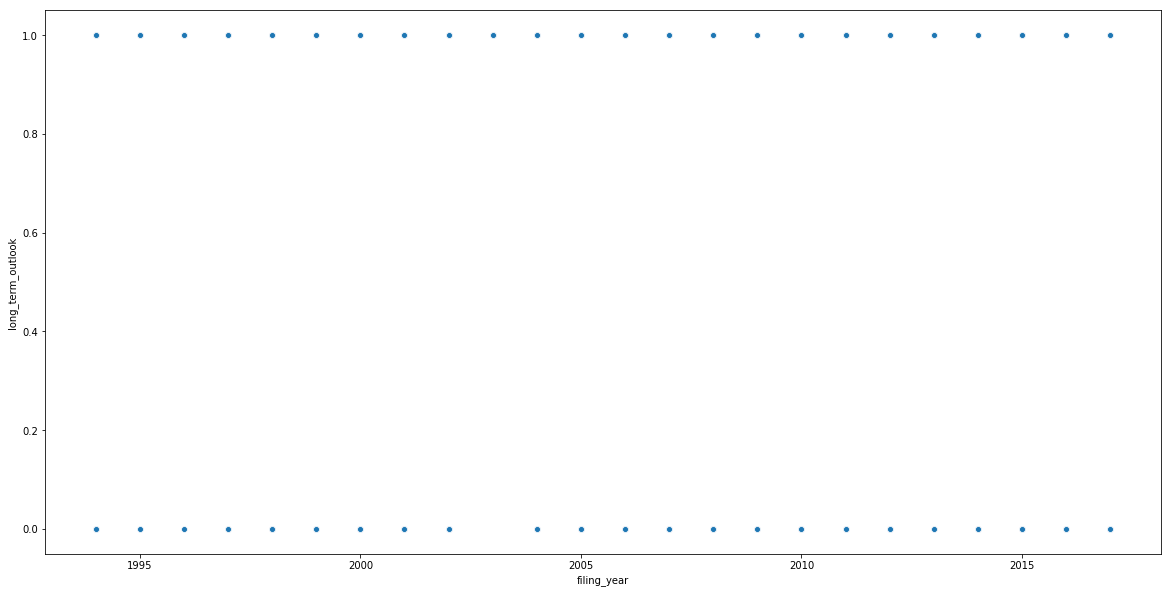

In [376]:
sns.scatterplot(x = final_train['filing_year'], y = final_train['long_term_outlook'])

## Vectorize the lemmatized text using TF-IDF

In [15]:
auditor = pd.read_csv('StopWords_Auditor.txt', header = None)
currency = pd.read_csv('StopWords_Currencies.txt', header = None, encoding = 'unicode_escape')
date_num = pd.read_csv('StopWords_DatesandNumbers.txt',header = None, encoding = 'unicode_escape')
gen = pd.read_csv('StopWords_Generic.txt', header = None, encoding = 'unicode_escape')
geo = pd.read_csv('StopWords_Geographic.txt', header = None, encoding = 'unicode_escape')
names = pd.read_csv("StopWords_Names.txt", header = None, encoding = 'unicode_escape')

stopwords_df = pd.concat([currency, date_num, gen, geo, names, auditor])

print(stopwords_df.shape)

stopwords_list = stopwords_df[0].tolist()

print(stopwords_list[0:100])

(13536, 1)
['AFGHANI', 'ARIARY', 'BAHT', 'BALBOA', 'BIRR', 'BOLIVAR', 'BOLIVIANO', 'CEDI', 'COLON', 'CÓRDOBA', 'DALASI', 'DENAR', 'DINAR', 'DIRHAM', 'DOBRA', 'DONG', 'DRAM', 'ESCUDO', 'EURO', 'FLORIN', 'FORINT', 'GOURDE', 'GUARANI', 'GULDEN', 'HRYVNIA', 'KINA', 'KIP', 'KONVERTIBILNA MARKA', 'KORUNA', 'KRONA', 'KRONE', 'KROON', 'KUNA', 'KWACHA', 'KWANZA', 'KYAT', 'LARI ', 'LATS', 'LEK', 'LEMPIRA', 'LEONE', 'LEU', 'LEV', 'LILANGENI', 'LIRA', 'LITAS', 'LOTI', 'MANAT', 'METICAL', 'NAIRA', 'NAKFA', 'NEW LIRA', 'NEW SHEQEL', 'NGULTRUM', 'NUEVO SOL', 'OUGUIYA', 'PATACA', 'PESO', 'POUND', 'PULA ', 'QUETZAL', 'RAND', 'REAL', 'RENMINBI', 'RIAL', 'RIEL', 'RINGGIT', 'RIYAL', 'RUBLE', 'RUFIYAA', 'RUPEE', 'RUPEE', 'RUPIAH', 'SHILLING', 'SOM', 'SOMONI', 'SPECIAL DRAWING RIGHTS', 'TAKA', 'TALA', 'TENGE', 'TUGRIK', 'VATU', 'WON', 'YEN', 'ZLOTY', 'HUNDRED  ', 'THOUSAND', 'MILLION', 'BILLION', 'TRILLION', 'DATE ', 'ANNUAL', 'ANNUALLY', 'ANNUM', 'YEAR', 'YEARLY', 'QUARTER', 'QUARTERLY', 'QTR', 'MONTH']


In [16]:
# stop_words_removed = []
# for tokenized_words in df['token_data']:
    
#     stop_words_removed.append([word for word in tokenized_words if word not in stopset])

In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [270]:
vectorizer = TfidfVectorizer()

### Train

In [271]:
vectorizer.fit(final_train['lemma'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [272]:
final_tf_idf = vectorizer.transform(final_train['lemma'])

In [273]:
type(final_tf_idf)

scipy.sparse.csr.csr_matrix

In [274]:
final_tf_idf.shape

(1000, 72309)

In [275]:
Dense_mat = final_tf_idf.todense()

In [276]:
Tfidf_df = pd.DataFrame(Dense_mat, columns=vectorizer.get_feature_names())

In [277]:
Tfidf_df.shape

(1000, 72309)

In [278]:
tf_idf = Tfidf_df.reset_index()

In [279]:
tf_idf.head(3)

,level_0,aa,aaa,aaaa,aaaaa,aaaaaa,aaasf,aaasuperior,aaav,aabf,...,zyp,zyprexa,zyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,0,0.001031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [280]:
data = pd.merge(final_train, tf_idf, left_on='Unnamed: 0', right_on='level_0')

In [281]:
data.shape

(1000, 72323)

In [282]:
data.head(2)

,Unnamed: 0,cik,long_term_outlook,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,Positive_Count,...,zyp,zyprexa,zyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,0,1004980,1,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",30809,"['UNITED', 'STATES', 'SECURITIES', 'EXCHANGE',...",2000,UNITED STATES SECURITIES EXCHANGE COMMISSION W...,"[UNITED, STATES, SECURITIES, EXCHANGE, COMMISS...",407,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,815097,0,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",20607,"['SECURITIES', 'EXCHANGE', 'COMMISSION', 'WASH...",2008,SECURITIES EXCHANGE COMMISSION WASHINGTON DC F...,"[SECURITIES, EXCHANGE, COMMISSION, WASHINGTON,...",98,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Test

In [283]:
tfidf_test = vectorizer.transform(final_test['lemma'])

In [284]:
type(tfidf_test)

scipy.sparse.csr.csr_matrix

In [285]:
tfidf_test.shape

(856, 72309)

In [286]:
test_dense_mat = tfidf_test.todense()
#test_Tfidf_df = pd.DataFrame(test_dense_mat, columns=vectorizertest.get_feature_names())

In [287]:
test_Tfidf_df = pd.DataFrame(test_dense_mat, columns=vectorizer.get_feature_names())

In [288]:
test_Tfidf_df.tail()

,aa,aaa,aaaa,aaaaa,aaaaaa,aaasf,aaasuperior,aaav,aabf,aachen,...,zyp,zyprexa,zyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [289]:
test_tf_idf = test_Tfidf_df.reset_index()

In [290]:
test_tf_idf.tail(2)

,level_0,aa,aaa,aaaa,aaaaa,aaaaaa,aaasf,aaasuperior,aaav,aabf,...,zyp,zyprexa,zyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
854,854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
test_data = pd.merge(final_test, test_tf_idf, left_on='id', right_on='level_0')

In [292]:
test_data.head(2)

,id_x,cik,sw_rem_data,word_count_sw_rem,lemma_data,filing_year,lemma,lemma_list,Positive_Count,Negative_Count,...,zyp,zyprexa,zyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,0,40533,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",41108,"['TABLE', 'OF', 'CONTENTS', 'UNITED', 'STATES'...",2012,TABLE OF CONTENTS UNITED STATES SECURITIES AND...,"[TABLE, OF, CONTENTS, UNITED, STATES, SECURITI...",357,410,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,36270,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",37429,"['UNITED', 'STATES', 'SECURITIES', 'AND', 'EXC...",1999,UNITED STATES SECURITIES AND EXCHANGE COMMISSI...,"[UNITED, STATES, SECURITIES, AND, EXCHANGE, CO...",183,349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing the dataframe for modelling

### Train

In [293]:
df = data.drop(columns = ['Unnamed: 0', 'cik', 'sw_rem_data', 'lemma_data','lemma', 'lemma_list', 'level_0', 'Positive_Count', 'Negative_Count'])

In [294]:
df.head(3)

,long_term_outlook,word_count_sw_rem,filing_year,Positive_Ratio,Negative_Ratio,aa,aaa,aaaa,aaaaa,aaaaaa,...,zyp,zyprexa,zyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,1,30809,2000,0.013210,0.023013,0.001031,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,20607,2008,0.004756,0.019168,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,17325,2009,0.010332,0.018701,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
df.dtypes

long_term_outlook       int64
word_count_sw_rem       int64
filing_year             int64
Positive_Ratio        float64
Negative_Ratio        float64
aa                    float64
aaa                   float64
aaaa                  float64
aaaaa                 float64
aaaaaa                float64
aaasf                 float64
aaasuperior           float64
aaav                  float64
aabf                  float64
aachen                float64
aacquired             float64
aacr                  float64
aadvantage            float64
aafrica               float64
aag                   float64
aah                   float64
aaik                  float64
aaipharma             float64
aalbers               float64
aami                  float64
aamounts              float64
aan                   float64
aao                   float64
aap                   float64
aaps                  float64
                       ...   
zweibrucken           float64
zweigniederlassung    float64
zwiener   

In [135]:
df.to_csv('Train_Tfidf_Final.csv')

### Test

In [297]:
test_df = test_data.drop(columns = ['cik', 'sw_rem_data', 'lemma_data','lemma', 'lemma_list', 'level_0', 'Positive_Count', 'Negative_Count'])

In [45]:
test_df.tail()

,id_x,word_count_sw_rem,filing_year,aa,aaa,aaaa,aaaaa,aaaaaa,aaaaaaaaa,aaaamendment,...,zyprexa,zyrtec,zyrteczyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
851,851,18992,2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
852,852,62174,2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
853,853,56179,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
854,854,47351,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
855,855,52851,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [298]:
test_df.shape

(856, 72314)

In [134]:
test_df.to_csv('Test_Tfidf_final.csv')

## Splitting dataframe

In [299]:
from sklearn.model_selection import train_test_split

### Train

In [300]:
X = df.drop(columns = 'long_term_outlook')
y = df['long_term_outlook']

In [301]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 99, stratify = y)

In [302]:
print('X Train dimensions: \n\n', x_train.shape, '\n\nX Validation dimensions: \n\n', x_val.shape, 
      '\n\nY Train dimensions:\n\n', y_train.shape, '\n\n Y Validation dimensions: \n\n', y_val.shape)

X Train dimensions: 

 (800, 72313) 

X Validation dimensions: 

 (200, 72313) 

Y Train dimensions:

 (800,) 

 Y Validation dimensions: 

 (200,)


### Test

In [303]:
x_test = test_df.drop(columns = ['id_x'])

In [304]:
x_test.head(2)

,word_count_sw_rem,filing_year,Positive_Ratio,Negative_Ratio,aa,aaa,aaaa,aaaaa,aaaaaa,aaasf,...,zyp,zyprexa,zyrtec,zyrteczytrec,zytiga,zyvox,zz,zzo,zzz,zzzz
0,41108,2012,0.008684,0.009974,0.003918,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37429,1999,0.004889,0.009324,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

### Load Error Metrics

In [305]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_curve,log_loss,auc

### Logistic Regression

In [306]:
from sklearn.linear_model import LogisticRegressionCV
logreg_cv = LogisticRegressionCV(cv = 10, random_state=0, class_weight = 'balanced')
from sklearn import metrics
%matplotlib inline

In [307]:
import matplotlib.pyplot as plt

#### Train and Validation

In [308]:
logreg_cv.fit(x_train, y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='warn', n_jobs=None, penalty='l2', random_state=0,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [309]:
y_log_pred = logreg_cv.predict(x_val)
y_log_train = logreg_cv.predict(x_train)

In [310]:
y_log_val_proba = logreg_cv.predict_proba(x_val)[::,1]

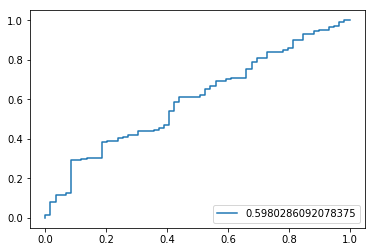

In [311]:
fpr, tpr, _ = metrics.roc_curve(y_val,  y_log_val_proba)
auc = metrics.roc_auc_score(y_val, y_log_val_proba)
plt.plot(fpr,tpr,label = str(auc))
plt.legend(loc=4)
plt.show()

AUC is 0.6.

In [312]:
### Train Data Accuracy - Log Reg
print("=========================== \n\n TRAIN DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_log_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_log_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_log_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_log_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_log_train, pos_label=1)/2 + f1_score(y_train, y_log_train, pos_label=1)/2)

### Val Data Accuracy - Log Reg
print("=========================== \n\n VALIDATION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_log_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_log_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_log_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_log_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_log_pred, pos_label=1)/2 + f1_score(y_val, y_log_pred, pos_label=1)/2)



 TRAIN DATA METRICS



 Confusion Matrix

 [[ 98 140]
 [235 327]]



 Accuracy Score

 0.53125



 F1 Score for Class 0

 0.34325744308231176



 F1 Score for Class 1

 0.6355685131195334



 Average F1 Score

 0.6355685131195334

 VALIDATION DATA METRICS



 Confusion Matrix

 [[28 31]
 [53 88]]



 Accuracy Score

 0.58



 F1 Score for Class 0

 0.3999999999999999



 F1 Score for Class 1

 0.676923076923077



 Average F1 Score

 0.676923076923077


#### Test

In [313]:
y_log_test = logreg_cv.predict(x_test)

In [314]:
log_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_log_test}

log_pred_file = pd.DataFrame(log_pred_file)

log_pred_file.to_csv('Logistic_Regression_Dictionary_Prediction.csv', index = False)

### Naive Bayes


#### Load Algorithm

In [315]:
from sklearn.naive_bayes import MultinomialNB

#### Train and Validation

In [316]:
NBmodel = MultinomialNB().fit(x_train, y_train)

y_NB_pred = NBmodel.predict(x_val)
y_NB_train = NBmodel.predict(x_train)


In [317]:
### Train Data Accuracy - NB
print("=========================== \n\n TRAIN DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_NB_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_NB_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_NB_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_NB_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_NB_train, pos_label=1)/2 + f1_score(y_train, y_NB_train, pos_label=1)/2)

### Val Data Accuracy - NB
print("=========================== \n\n VALIDATION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_NB_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_NB_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_NB_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_NB_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_NB_pred, pos_label=1)/2 + f1_score(y_val, y_log_pred, pos_label=1)/2)




 TRAIN DATA METRICS



 Confusion Matrix

 [[  0 238]
 [  0 562]]



 Accuracy Score

 0.7025


C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)





 F1 Score for Class 0

 0.0



 F1 Score for Class 1

 0.8252569750367107



 Average F1 Score

 0.8252569750367107

 VALIDATION DATA METRICS



 Confusion Matrix

 [[  0  59]
 [  0 141]]



 Accuracy Score

 0.705



 F1 Score for Class 0

 0.0



 F1 Score for Class 1

 0.8269794721407624



 Average F1 Score

 0.7519512745319197


#### Test

In [318]:
y_NB_test = NBmodel.predict(x_test)

In [319]:
NB_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_NB_test}

NB_pred_file = pd.DataFrame(NB_pred_file)

NB_pred_file.to_csv('Naive_Bayes_Dictionary_Prediction.csv', index = False)

### Linear Support Vector Machine

#### Load Algorithm

In [320]:
from sklearn import svm

In [321]:
from sklearn.model_selection import RandomizedSearchCV

In [322]:
#Create a svm Classifier
clf = svm.SVC(class_weight='balanced') # Linear Kernel

In [323]:
#Train the model using the training sets
clf.fit(x_train, y_train)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [324]:
#Predict the response for train & Validation dataset
y_SVMclf_pred = clf.predict(x_val)
y_SVMclf_train = clf.predict(x_train)

In [325]:
### Train Data Accuracy - SVM
print("=========================== \n\n TRAIN DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_SVMclf_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_SVMclf_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_SVMclf_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_SVMclf_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_SVMclf_train, pos_label=1, labels=np.unique(y_train))/2 + f1_score(y_train, y_SVMclf_train, pos_label=1, labels=np.unique(y_train))/2)

### Val Data Accuracy - SVM
print("=========================== \n\n VALIDATION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_SVMclf_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_SVMclf_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_SVMclf_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_SVMclf_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_SVMclf_pred, pos_label=1)/2 + f1_score(y_val, y_SVMclf_pred, pos_label=1)/2)




 TRAIN DATA METRICS



 Confusion Matrix

 [[179  59]
 [184 378]]



 Accuracy Score

 0.69625



 F1 Score for Class 0

 0.5956738768718801



 F1 Score for Class 1

 0.7567567567567568



 Average F1 Score

 0.7567567567567568

 VALIDATION DATA METRICS



 Confusion Matrix

 [[28 31]
 [59 82]]



 Accuracy Score

 0.55



 F1 Score for Class 0

 0.3835616438356164



 F1 Score for Class 1

 0.6456692913385826



 Average F1 Score

 0.6456692913385826


#### Test

In [326]:
y_SVMclf_test = clf.predict(x_test)

In [327]:
SVM_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_SVMclf_test}

SVM_pred_file = pd.DataFrame(SVM_pred_file)

SVM_pred_file.to_csv('SVM_Dictionary_Prediction.csv', index = False)

### Decision Tree


#### Load Algorithm

In [328]:
from sklearn import tree
import matplotlib.pyplot as plt


In [329]:
DT_classifier = tree.DecisionTreeClassifier(random_state=2, criterion = 'entropy')

#### Validation 

In [330]:
DT_classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

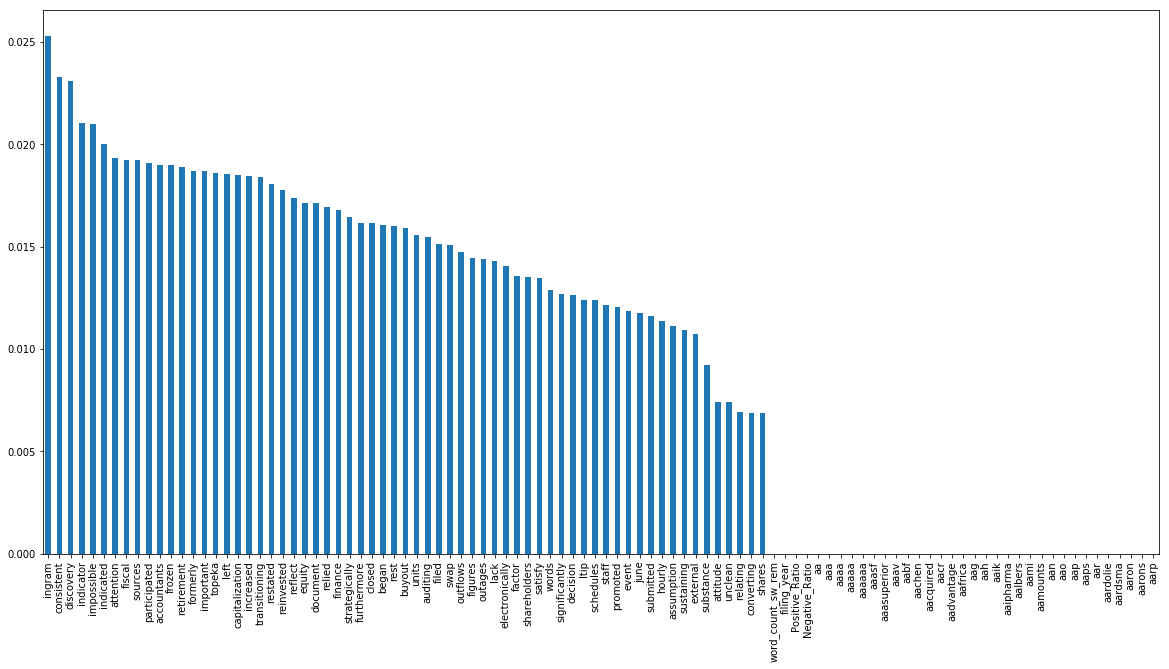

In [331]:
imp_feature = pd.Series(DT_classifier.feature_importances_, index = x_train.columns)
imp_ordered = imp_feature.nlargest(100)
plt.rcParams['figure.figsize'] = (20,10)
imp_ordered.plot(kind = 'bar')

In [332]:
print('\n\n6 Most important feautures: \n\n', imp_ordered.head(2))
print('=========================================')
print('\n\n6 Least important features: \n\n',imp_ordered.tail(2))



6 Most important feautures: 

 ingram        0.025275
consistent    0.023280
dtype: float64


6 Least important features: 

 aarons    0.0
aarp      0.0
dtype: float64


In [333]:
y_DT_pred = DT_classifier.predict(x_val)
y_DT_train = DT_classifier.predict(x_train)

In [334]:
### Train Data Accuracy - DT
print("=========================== \n\n TRAIN DATA METRICS\n\n")
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_DT_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_DT_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_DT_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_DT_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_DT_train, pos_label=1)/2 + f1_score(y_train, y_DT_train, pos_label=1)/2)

### Val Data Accuracy - DT
print("=========================== \n\n vALIDATIION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_DT_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_DT_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_DT_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_DT_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_DT_pred, pos_label=1)/2 + f1_score(y_val, y_DT_pred, pos_label=1)/2)




 TRAIN DATA METRICS



 Confusion Matrix

 [[238   0]
 [  0 562]]



 Accuracy Score

 1.0



 F1 Score for Class 0

 1.0



 F1 Score for Class 1

 1.0



 Average F1 Score

 1.0

 vALIDATIION DATA METRICS



 Confusion Matrix

 [[17 42]
 [44 97]]



 Accuracy Score

 0.57



 F1 Score for Class 0

 0.2833333333333333



 F1 Score for Class 1

 0.6928571428571428



 Average F1 Score

 0.6928571428571428


#### Test

In [335]:
y_DT_test = DT_classifier.predict(x_test)

In [336]:
DT_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_DT_test}

DT_pred_file = pd.DataFrame(DT_pred_file)

DT_pred_file.to_csv('Decision_Tree_Dictionary_Prediction.csv', index = False)

### Random Forest

#### Load ALgorithm

In [337]:
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV


#### Train and Validation

In [338]:
RF_classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=2)

param_grid = {'n_estimators' : [5,7,9,11,13,15,17,19],
             'max_depth' : [2,3,4,5,6,7,8,9,10,11,12],
              "min_samples_leaf" : [5, 10, 15, 20],
              "class_weight" : ['balanced','balanced_subsample']}

In [ ]:
# Create regularization penalty space
#penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
#C = uniform(loc=0, scale=4)

# Create hyperparameter options
#hyperparameters = dict(C=C, penalty=penalty)

In [339]:
rfc_cv = RandomizedSearchCV(estimator=RF_classifier, param_distributions=param_grid, n_iter=10,cv=4)


In [340]:
rfc_cv.fit(x_train, y_train)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [5, 7, 9, 11, 13, 15, 17, 19], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_leaf': [5, 10, 15, 20], 'class_weight': ['balanced', 'balanced_subsample']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [341]:
rfc_cv.best_params_


{'n_estimators': 17,
 'min_samples_leaf': 15,
 'max_depth': 11,
 'class_weight': 'balanced'}

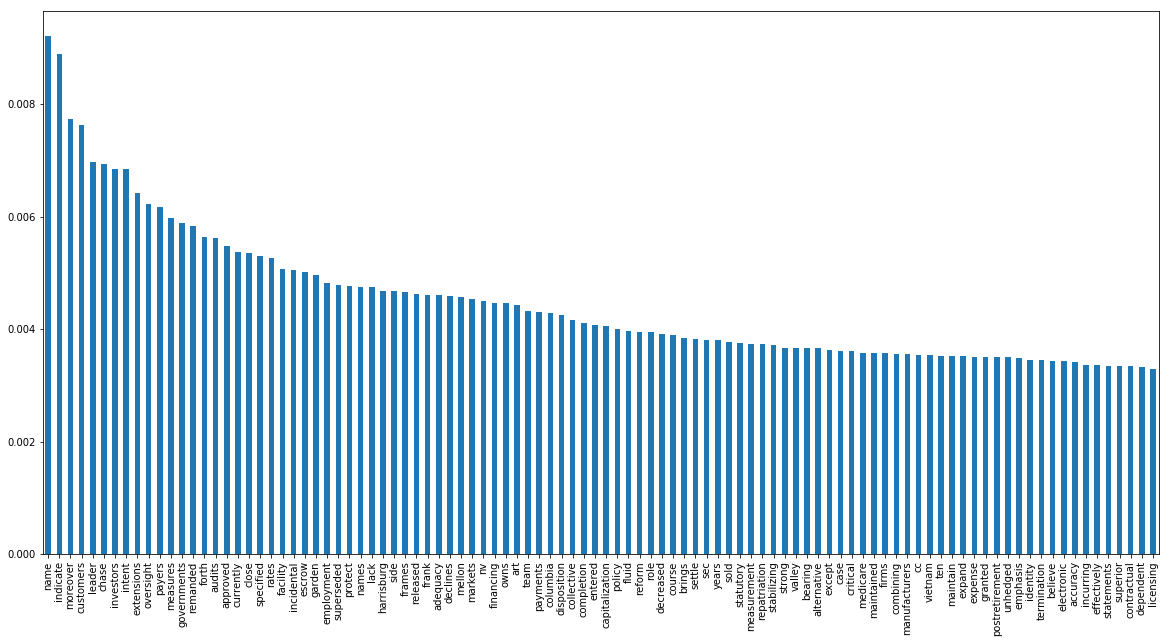

In [342]:
feat_importances = pd.Series(rfc_cv.best_estimator_.feature_importances_, index = x_train.columns)
feat_importances_ordered = feat_importances.nlargest(100)
feat_importances_ordered.plot(kind='bar')

In [343]:
rf_clf = RandomForestClassifier(n_estimators = 17, min_samples_leaf = 15, max_depth = 11, class_weight = 'balanced', criterion = 'entropy')

In [344]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=11, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=15,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=17, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [345]:
y_RF_pred = rf_clf.predict(x_val)
y_RF_train = rf_clf.predict(x_train)

In [346]:
### Train Data Accuracy - RF
print("=========================== \n\n TRAIN DATA METRICS\n\n")
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_RF_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_RF_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_RF_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_RF_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_RF_train, pos_label=1)/2 + f1_score(y_train, y_RF_train, pos_label=1)/2)

### Val Data Accuracy - RF
print("=========================== \n\n vALIDATIION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_RF_pred))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_RF_pred))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_RF_pred, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_RF_pred, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_RF_pred, pos_label=1)/2 + f1_score(y_val, y_RF_pred, pos_label=1)/2)



 TRAIN DATA METRICS



 Confusion Matrix

 [[190  48]
 [ 32 530]]



 Accuracy Score

 0.9



 F1 Score for Class 0

 0.8260869565217392



 F1 Score for Class 1

 0.9298245614035088



 Average F1 Score

 0.9298245614035088

 vALIDATIION DATA METRICS



 Confusion Matrix

 [[ 11  48]
 [ 36 105]]



 Accuracy Score

 0.58



 F1 Score for Class 0

 0.20754716981132076



 F1 Score for Class 1

 0.7142857142857144



 Average F1 Score

 0.7142857142857144


#### Test

In [347]:
y_RF_test = rf_clf.predict(x_test)

In [348]:
RF_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_RF_test}

RF_pred_file = pd.DataFrame(RF_pred_file)

RF_pred_file.to_csv('Random_Forest_Dictionary_Prediction.csv', index = False)

### Stacking

#### Load Algorithm

In [349]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#### Train and Validation

In [350]:
#Decision Tree

dtc = DecisionTreeClassifier()

In [356]:
dtc.fit(x_train,y_train)

y_stac_DT_pred = dtc.predict(x_val)
y_stac_DT_train = dtc.predict(x_train)


In [351]:
#Logistic regression

lrc = LogisticRegression()

In [352]:
lrc.fit(x_train,y_train)

y_stac_lrc_pred = lrc.predict(x_val)
y_stac_lrc_train = lrc.predict(x_train)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [353]:
# SVM
clf = svm.SVC(kernel='linear')

In [357]:
clf.fit(x_train,y_train)

y_stac_SVM_pred = clf.predict(x_val)
y_stac_SVM_train = clf.predict(x_train)


##### Stacking

In [358]:
stack_val = pd.DataFrame([y_stac_DT_pred,y_stac_lrc_pred, y_stac_SVM_pred])
stack_train = pd.DataFrame([y_stac_DT_train,y_stac_lrc_train, y_stac_SVM_train])


In [359]:
print(stack_val.head())

   0    1    2    3    4    5    6    7    8    9    ...  190  191  192  193  \
0    1    1    1    0    1    1    1    1    0    1  ...    1    1    0    0   
1    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
2    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

   194  195  196  197  198  199  
0    1    1    1    1    1    1  
1    1    1    1    1    1    1  
2    1    1    1    1    1    1  

[3 rows x 200 columns]


In [360]:
stack_val = stack_val.T
stack_train = stack_train.T

In [361]:
stack_val.columns = ['y_stac_DT_pred','y_stac_lrc_pred', 'y_stac_SVM_pred']
stack_train.columns = ['y_stac_DT_train','y_stac_lrc_train', 'y_stac_SVM_pred']

In [362]:
print(stack_val.shape)
print(stack_train.shape)

(200, 3)
(800, 3)


In [363]:
stack = LogisticRegression()

In [364]:
stack.fit(stack_train,y_train)

C:\Users\UrMili\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [365]:
y_stacked_pred_val = stack.predict(stack_val)
y_stacked_pred_train = stack.predict(stack_train)

In [366]:
### Train Data Accuracy - Stacking
print("=========================== \n\n TRAIN DATA METRICS\n\n")
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_train, y_stacked_pred_train))
print("\n\n========================== \n\n Accuracy Score\n\n",accuracy_score(y_train, y_stacked_pred_train))
print("\n\n========================== \n\n F1 Score for Class 0\n\n",f1_score(y_train, y_stacked_pred_train, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n",f1_score(y_train, y_stacked_pred_train, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_train, y_stacked_pred_train, pos_label=1)/2 + f1_score(y_train, y_stacked_pred_train, pos_label=1)/2)

### Val Data Accuracy - Stacking
print("=========================== \n\n vALIDATIION DATA METRICS\n\n") 
print("=========================== \n\n Confusion Matrix\n\n", confusion_matrix(y_val, y_stacked_pred_val))
print("\n\n========================== \n\n Accuracy Score\n\n", accuracy_score(y_val, y_stacked_pred_val))
print("\n\n========================== \n\n F1 Score for Class 0\n\n", f1_score(y_val, y_stacked_pred_val, pos_label=0))
print("\n\n========================== \n\n F1 Score for Class 1\n\n", f1_score(y_val, y_stacked_pred_val, pos_label=1))
print("\n\n========================== \n\n Average F1 Score\n\n", f1_score(y_val, y_stacked_pred_val, pos_label=1)/2 + f1_score(y_val, y_stacked_pred_val, pos_label=1)/2)


 TRAIN DATA METRICS



 Confusion Matrix

 [[238   0]
 [  0 562]]



 Accuracy Score

 1.0



 F1 Score for Class 0

 1.0



 F1 Score for Class 1

 1.0



 Average F1 Score

 1.0

 vALIDATIION DATA METRICS



 Confusion Matrix

 [[ 11  48]
 [ 39 102]]



 Accuracy Score

 0.565



 F1 Score for Class 0

 0.20183486238532108



 F1 Score for Class 1

 0.7010309278350516



 Average F1 Score

 0.7010309278350516


#### Test

In [367]:
#Decision Tree

#dtc = DecisionTreeClassifier()

y_stac_DT_test = dtc.predict(x_test)


#Logistic regression

#lrc = LogisticRegression()

y_stac_lrc_test = lrc.predict(x_test)

#SVM

#clf = svm.SVC(kernel='linear')

y_stac_SVM_test = clf.predict(x_test)


In [368]:
stack_test = pd.DataFrame([y_stac_DT_test, y_stac_lrc_test, y_stac_SVM_test])


print(stack_test.head())

stack_test = stack_test.T

stack_test.columns = ['y_stac_DT_test','y_stac_lrc_test', 'y_stac_SVM_test']

print(stack_test.shape)
#print(stack_train.shape)

#stack = LogisticRegression()

y_stacked_pred_test = stack.predict(stack_test)

print(len(y_stacked_pred_test))

   0    1    2    3    4    5    6    7    8    9    ...  846  847  848  849  \
0    0    0    1    1    1    0    0    1    1    1  ...    1    1    1    1   
1    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   
2    1    1    1    1    1    1    1    1    1    1  ...    1    1    1    1   

   850  851  852  853  854  855  
0    0    1    1    0    0    1  
1    1    1    1    1    1    1  
2    1    1    1    1    1    1  

[3 rows x 856 columns]
(856, 3)
856


In [369]:
Stack_pred_file = {'id': test_df['id_x'], 'long_term_outlook': y_stacked_pred_test}

Stack_pred_file = pd.DataFrame(Stack_pred_file)

Stack_pred_file.to_csv('Stacking_Dictionary_Prediction.csv', index = False)

## Conclusion

The Average F1 Scores for the algorithms.

In [370]:
final_metrics = {'Logistic_Regression': f1_score(y_val, y_log_pred, pos_label=1)/2 + f1_score(y_val, y_log_pred, pos_label=1)/2, 'Naive_Bayes': f1_score(y_val, y_NB_pred, pos_label=1)/2 + f1_score(y_val, y_log_pred, pos_label=1)/2, 'SVM' : f1_score(y_val, y_SVMclf_pred, pos_label=1)/2 + f1_score(y_val, y_SVMclf_pred, pos_label=1)/2,'Decision_Tree': f1_score(y_val, y_DT_pred, pos_label=1)/2 + f1_score(y_val, y_DT_pred, pos_label=1)/2,'Random_Forest': f1_score(y_val, y_RF_pred, pos_label=1)/2 + f1_score(y_val, y_RF_pred, pos_label=1)/2, 'Stacking': f1_score(y_val, y_stacked_pred_val, pos_label=1)/2 + f1_score(y_val, y_stacked_pred_val, pos_label=1)/2}

In [371]:
print('**Average F1 score values of different algorithms**: \n')
f1_score = pd.DataFrame(final_metrics, index = [0])
f1_score

**Average F1 score values of different algorithms**: 



,Logistic_Regression,Naive_Bayes,SVM,Decision_Tree,Random_Forest,Stacking
0,0.676923,0.751951,0.645669,0.692857,0.714286,0.701031
